# Ejercicio 1 KNN

Martin Alejandro Flores Saldaña - 22170647


## How does KNN handle multi-class classification problems?

K-Nearest Neighbors (KNN) stands as a fundamental algorithm, wielding versatility in handling both classification and regression tasks. In this article, we will understand what are KNNs and how they handle multi-classification problems.

## What are k-nearest neighbors (KNNs)?

K-Nearest Neighbors (KNN) can used for both classification and regression tasks. It belongs to the category of supervised learning, meaning it learns from labeled data to make predictions on new, unseen data. It comes under lazy learning algorithms as there is no training time involved instead it memorizes the entire dataset and makes predictions based on the similarity of new points and existing points in the dataset.

## Distance Metrics in KNN

We measure the similarity between data points using distance metrics. There are several distance metrics are used in KNN. The most frequently used are Euclidean distance, Manhattan distance, and Minkowski distance.

  1.  Euclidean Distance: This is the straight-line distance between two points in n-dimensional space. Imagine points on a grid – Euclidean distance calculates the shortest path between them. It's widely used due to its geometric intuitiveness.
  2.  Manhattan Distance: This metric represents the total distance traveled along each axis (horizontal and vertical movements) to get from one point to another. Imagine traveling only by blocks in a city grid – Manhattan distance captures this restricted movement.
  3.  Minkowski Distance: This is a more general formula that encompasses both Euclidean and Manhattan distances as special cases. It introduces a parameter 'p' that allows for different ways of computing the distance. When 'p' equals 2, it becomes Euclidean distance. When 'p' equals 1, it transforms into Manhattan distance. Minkowski distance offers flexibility for exploring alternative distance measures.

## KNN for Multi-Class classification

KNN offers a versatile approach to multi-classification tasks, various steps for performing knn for multi-classification are:

  1.  Data Preprocessing - Split the dataset into train and test after performing data scaling.
  2.  Choosing the 'K' value - Choose the optimal value of 'K'.
  3.  Training the model - Model stores the entire dataset into memory.
  4.  Classifying test data points - For each data point, calculate the distance of it from its 'K' nearest neighbors and assign the test point to the class label with the highest number of neighbors.
  5.  Evaluating Performance - Evaluate performance using different performance metrics like accuracy, precision, recall, and F1-score.

Step 1: Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

Step 2: Data Description

In [2]:
data = pd.read_csv('https://github.com/umdalecs/IA-agodic2025/raw/main/datasets/dataset-tortuga.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20000 non-null  int64  
 1   NAME                              20000 non-null  object 
 2   USER_ID                           20000 non-null  int64  
 3   HOURS_DATASCIENCE                 19986 non-null  float64
 4   HOURS_BACKEND                     19947 non-null  float64
 5   HOURS_FRONTEND                    19984 non-null  float64
 6   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 7   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 8   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 9   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 10  NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 11  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 12  AVG_

Step 3: Data Preprocessing

In [3]:
features = data.select_dtypes(include=np.number).columns.tolist()
features = features[1:]
imputer = SimpleImputer(strategy='mean')
data[features] = pd.DataFrame(imputer.fit_transform(data[features]), columns=features)
data.isna().sum()

,0
Unnamed: 0,0
NAME,0
USER_ID,0
HOURS_DATASCIENCE,0
HOURS_BACKEND,0
HOURS_FRONTEND,0
NUM_COURSES_BEGINNER_DATASCIENCE,0
NUM_COURSES_BEGINNER_BACKEND,0
NUM_COURSES_BEGINNER_FRONTEND,0
NUM_COURSES_ADVANCED_DATASCIENCE,0


Step 4: Splitting the data

In [4]:
X = data.drop(['PROFILE', 'NAME', 'USER_ID'], axis = 1)
y = data['PROFILE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Step 5: Scaling the data

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 6: Finding the optimal value of 'K'

We find the optimal value of 'K' simply by trying out multiple values of 'K' and checking which performs the best.

'K' refers to the number of nearest neighbors to consider while making predictions. It is the most important hyperparameter in KNN. For example, if K = 3, the algorithm will look at the three closest data points to the point we are trying to classify and assign the majority class label among the neighbors to the new data point.

The value of K depends on our data. We avoid even values of K since it will lead to conflict while making predictions. We usually find this value by trying out different values for 'K' and see which value is giving us better performance.

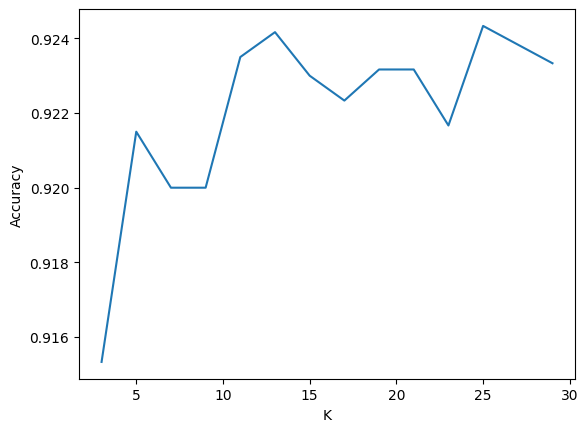

In [6]:
acc = {}
for k in range(3, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc[k] = accuracy_score(y_test, y_pred)

# PLotting K v/s accuracy graph
plt.plot(range(3,30,2), acc.values())
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()